100%|██████████| 4442/4442 [00:02<00:00, 1611.38it/s]


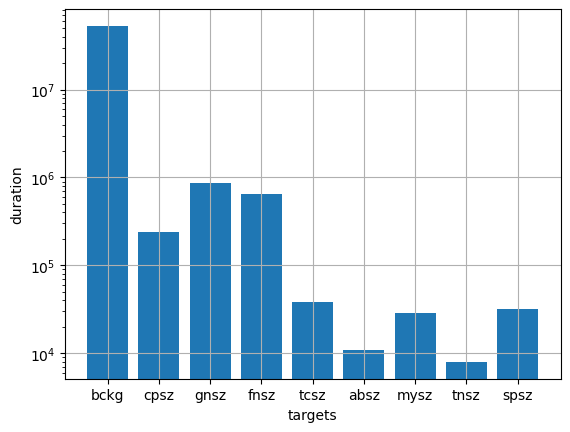

In [8]:
from collections import Counter
import glob
from matplotlib import pyplot as plt
import os
import pandas
import tqdm


edf_path = "/path/to/edf/files"


assert os.path.isdir(edf_path)


csv_files = sorted(glob.glob(os.path.join(edf_path, "*.csv")))
label_durations = Counter()

for file in tqdm.tqdm(csv_files):
    csv_data = pandas.read_csv(file, delimiter = ",", skiprows = 5)
    durations = csv_data['stop_time'].to_numpy() - csv_data['start_time'].to_numpy()
    labels = csv_data['label'].to_numpy()
    for label, duration in zip(labels, durations):
        label_durations[label] += duration

names = dict(label_durations).keys()
values = dict(label_durations).values()


plt.bar(names, values)
plt.yscale('log')
plt.xlabel('targets')
plt.ylabel('duration')
plt.grid()